In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:

# Preprocessing
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_19124\84137142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_19124\84137142.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [5]:
# Feature engineering
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = np.where(df['Family_Size'] == 1, 1, 0)


In [6]:
# Feature scaling
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [7]:
# Select features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size', 'Is_Alone']]
y = df['Survived']

In [8]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Model selection and hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [10]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [11]:
# Best model
best_model = grid_search.best_estimator_

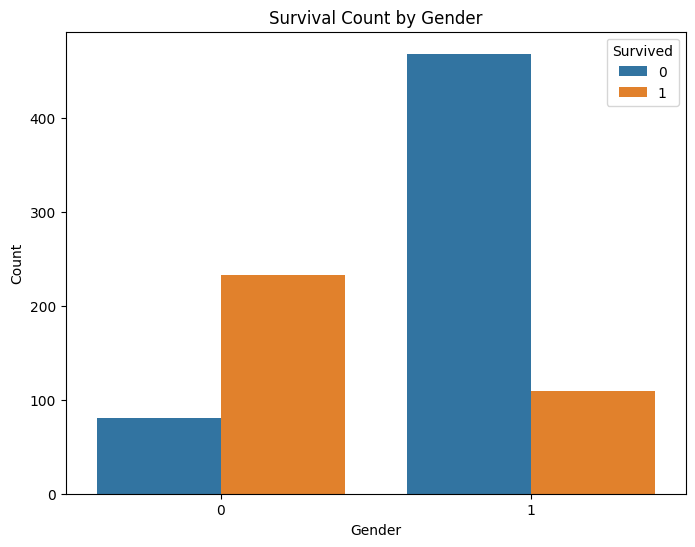

In [12]:
# Visualizations
# Plot the distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

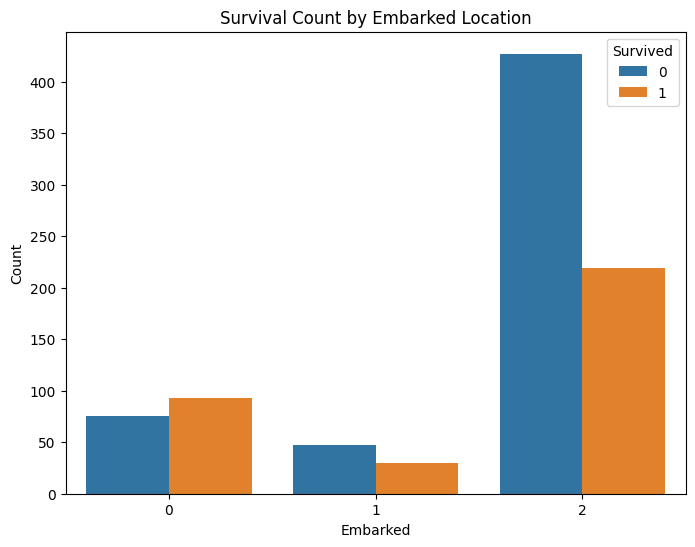

In [13]:
# Plot the distribution of embarked locations
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


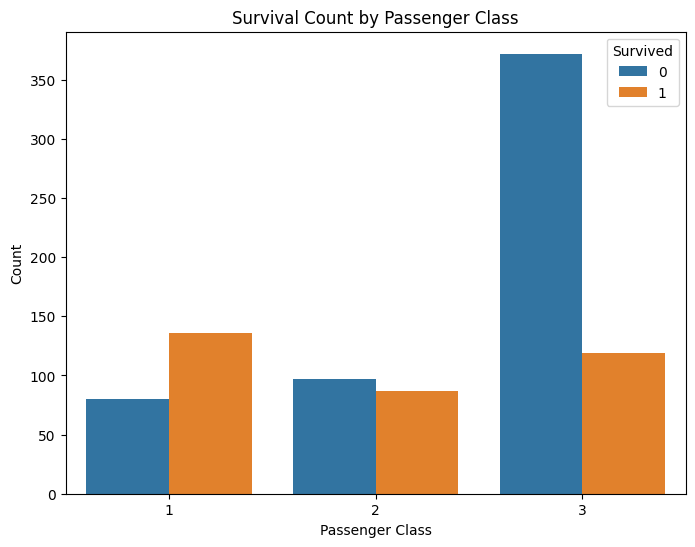

In [14]:
# Plot the distribution of passenger classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

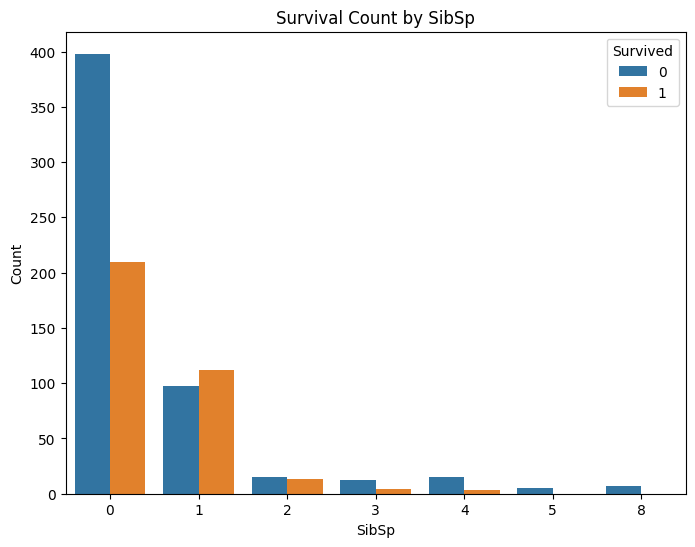

In [15]:
# Plot the distribution of siblings/spouses aboard
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Count by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

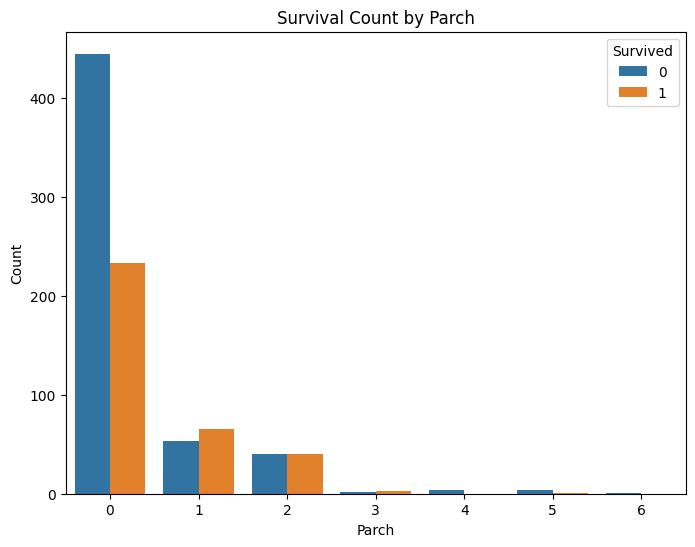

In [16]:
# Plot the distribution of parents/children aboard
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()



C:\Users\aditya tiwari\AppData\Local\Temp\ipykernel_19124\2092815848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


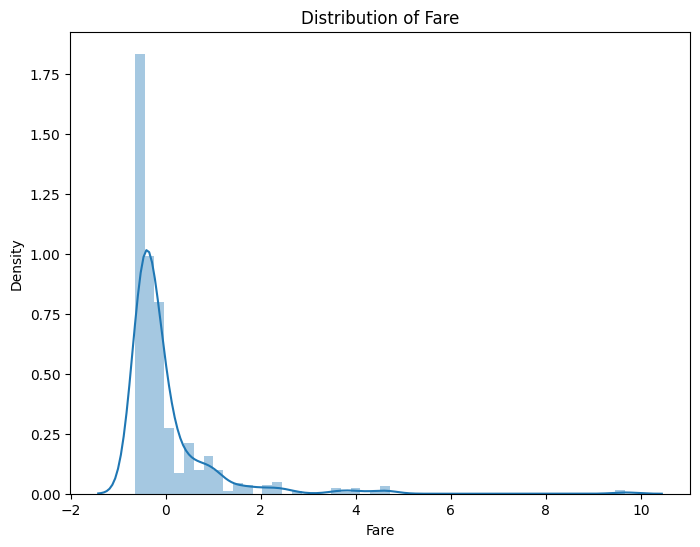

In [17]:
# Plot the distribution of fare
plt.figure(figsize=(8, 6))
sns.distplot(df['Fare'])
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()


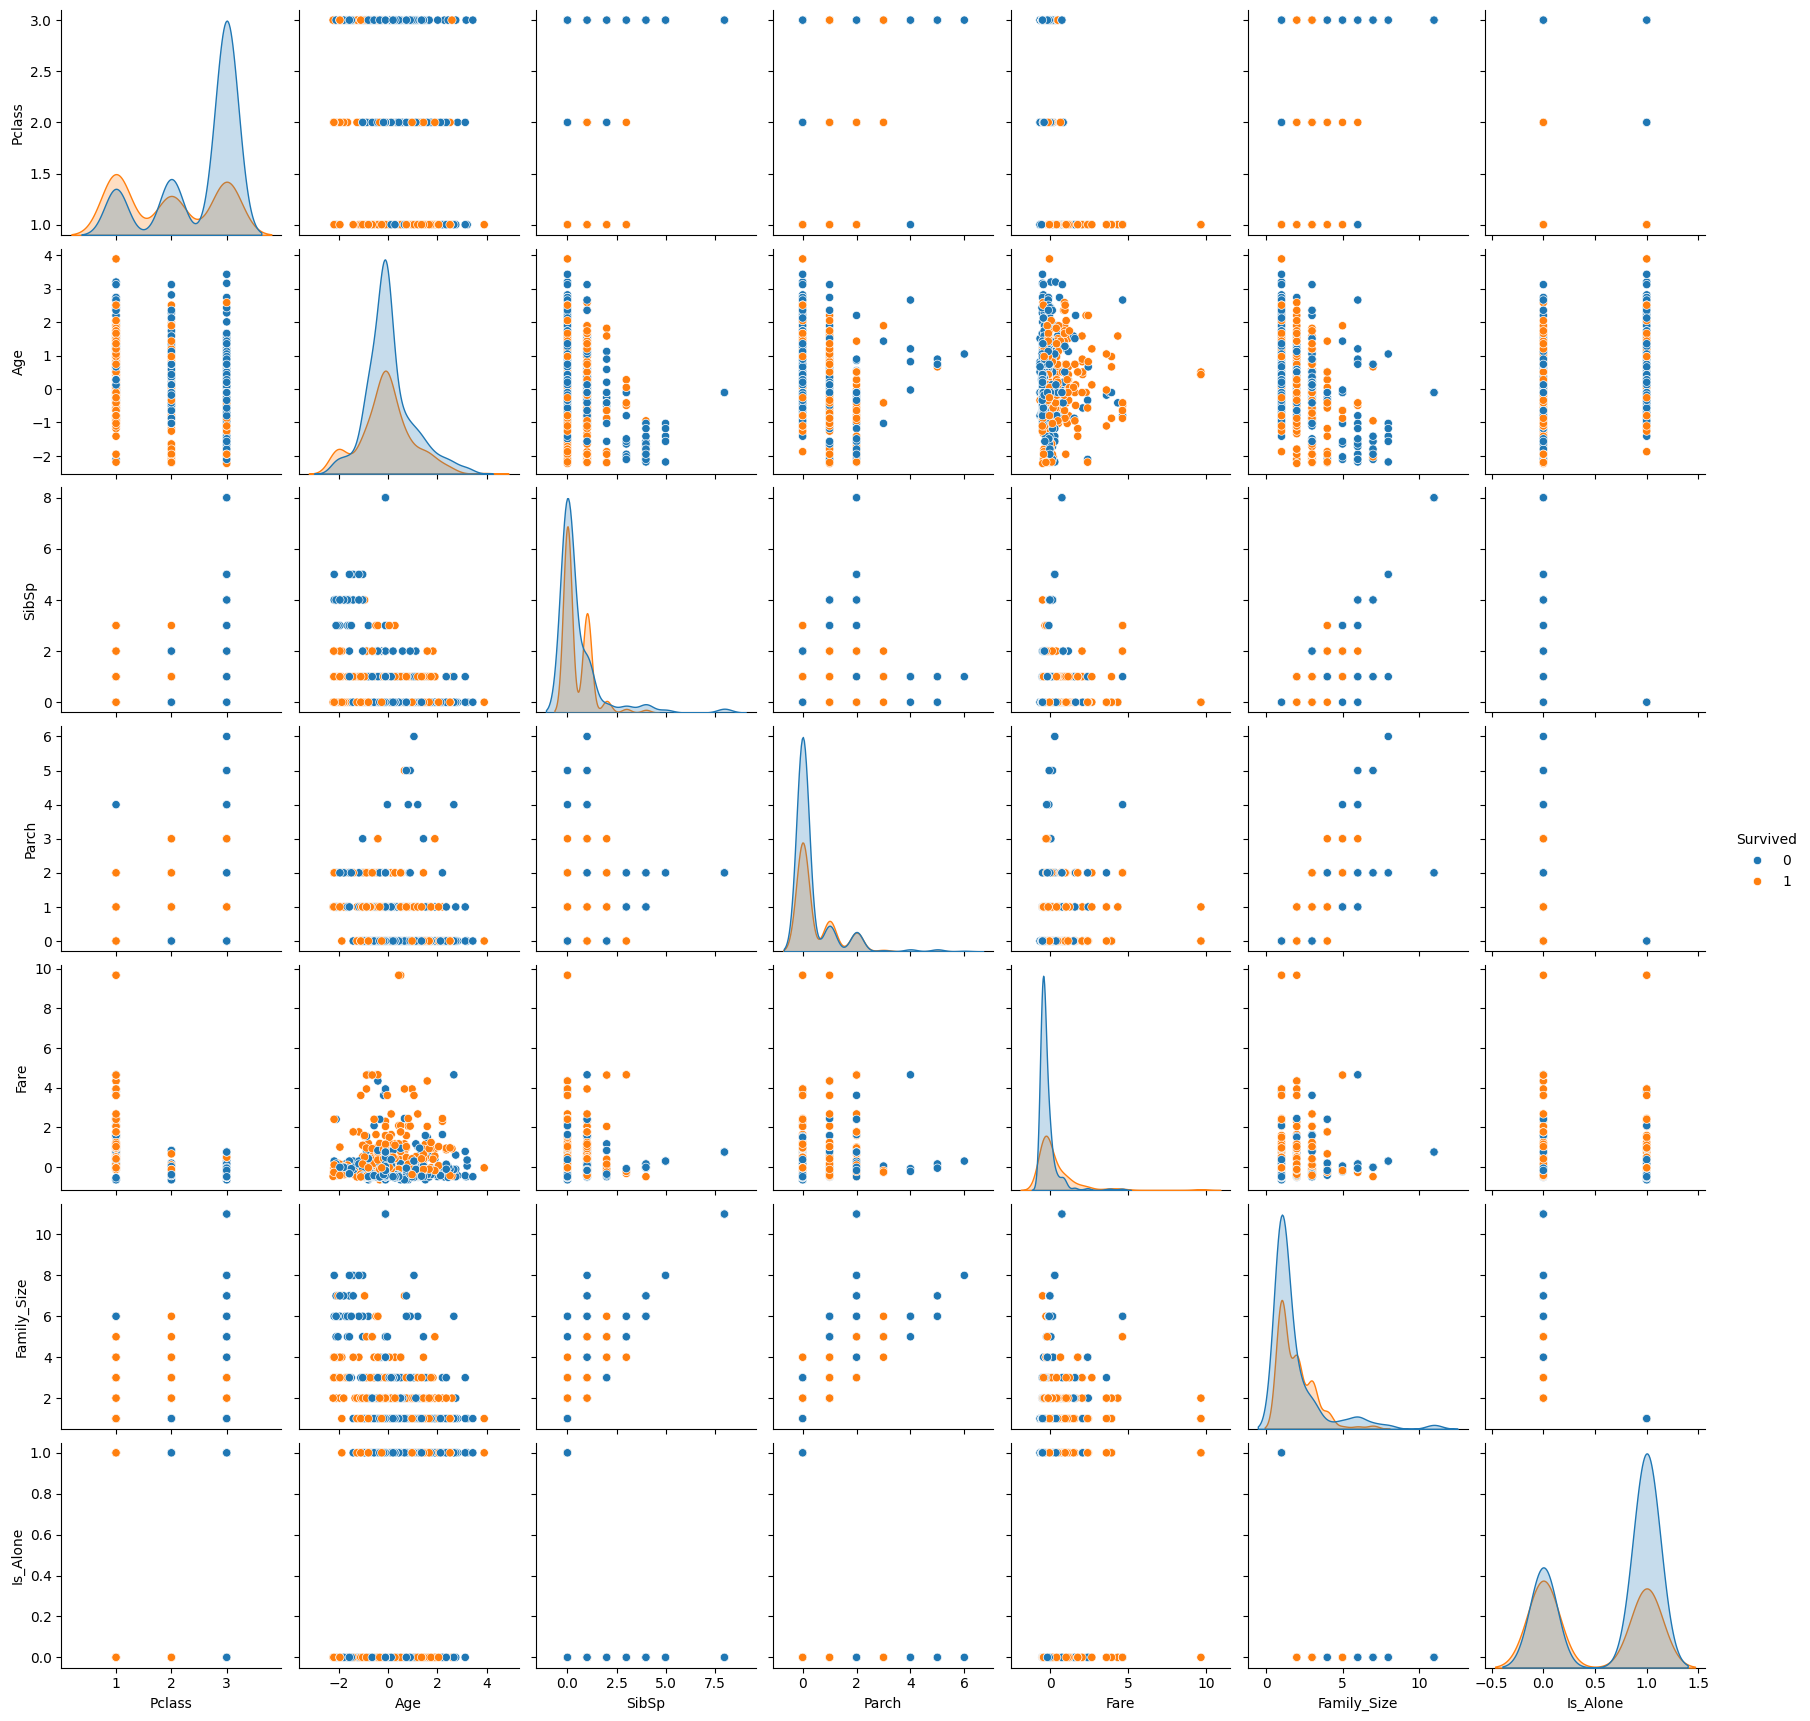

In [18]:
# Plot scatter plots for 'Survived' vs other features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Is_Alone']], hue='Survived', diag_kind='kde')
plt.show()


In [19]:
# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435754189944135
